# Learning Curve

### Constant Model

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constant Model
def constantModel(X):
    return np.mean(np.sin(np.dot(np.pi, X)))

def meanModel(models):
    return np.mean(models)

def costFunction(y_pred, y):                     # Mean Sqaure Error (MSE)
    return np.mean((y_pred - y) ** 2)

In [95]:
# Define the function
def problem(X):
    epsilon = np.random.randn(len(X)) * 0.3  # Noise with standard deviation of 0.1
    return np.sin(np.pi * X) + epsilon

(100,)


(-2.0, 2.0)

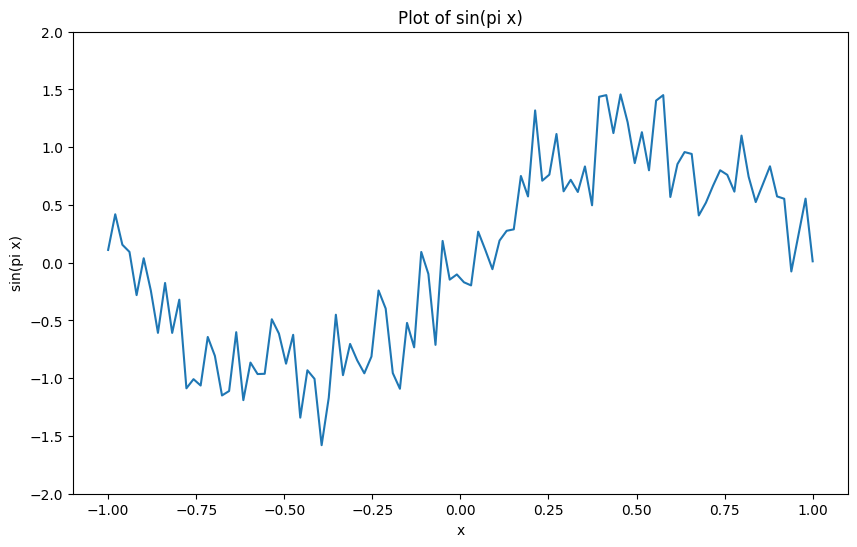

In [96]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

In [97]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []
bias_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)
        
        # for calculate E_out
        y_pred_validation = constantModel(X=rands_X)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = constantModel(X=rands_X)
        E_in[i].append(costFunction(y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel(E_d[i])
    print("Sample Size: ", sample_size_sets[i])
    
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    bias_all.append(bias)
    
    z = np.square(np.array(E_d[i]) - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance + 0.3 ** 2
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print(np.array(E_in_all))
print(np.array(sample_size_sets).shape)


Sample Size:  2
Bias: 0.622563248298195
Variance: 0.23549304356168374
E_out: 0.9480562918598787

Sample Size:  10
Bias: 0.6231096916009562
Variance: 0.05004514017134653
E_out: 0.7631548317723027

Sample Size:  20
Bias: 0.6232793453575762
Variance: 0.024564708181465788
E_out: 0.737844053539042

Sample Size:  30
Bias: 0.6235873257096878
Variance: 0.016421938971718137
E_out: 0.7300092646814059

Sample Size:  40
Bias: 0.6236949409484611
Variance: 0.011984822123116067
E_out: 0.7256797630715771

Sample Size:  50
Bias: 0.6236026410918288
Variance: 0.009616224003565604
E_out: 0.7232188650953945

Sample Size:  60
Bias: 0.6236176747354147
Variance: 0.008312867598911738
E_out: 0.7219305423343264

Sample Size:  70
Bias: 0.6239102045946358
Variance: 0.006810863533875318
E_out: 0.720721068128511

Sample Size:  80
Bias: 0.6233834908817023
Variance: 0.006592308057375762
E_out: 0.719975798939078

Sample Size:  90
Bias: 0.6236435990195051
Variance: 0.0057342516831251815
E_out: 0.7193778507026302

Sample

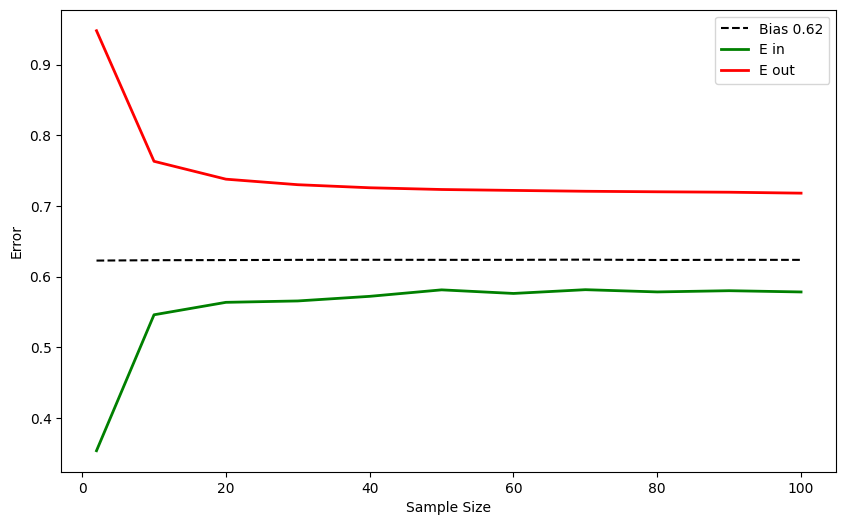

In [98]:
plt.figure(figsize=(10, 6))
bias_avg = np.mean(bias_all)
plt.plot(sample_size_sets, bias_all, label=f'Bias {bias_avg:.2f}', c="black", linestyle='--')
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()